In [31]:
import numpy as np
import pandas as pd

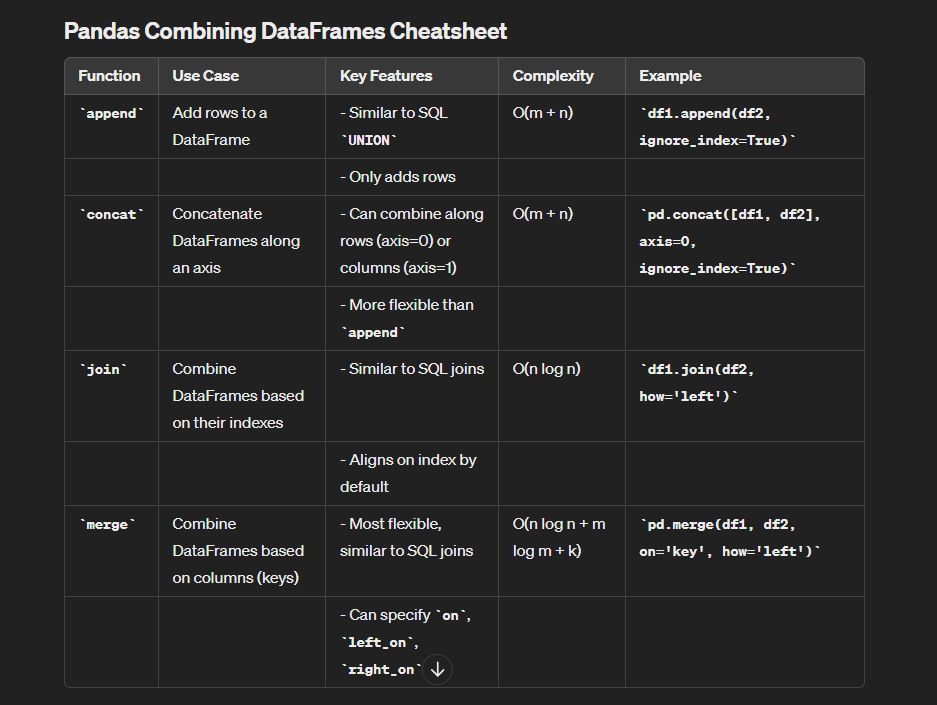

In [32]:
d1 = {'A':['A1','A2','A3','A4','A5'],'B':['B1','B2','B3','B4','B5']}
d2 = {'C':['C1','C2','C3','C4','C5'], 'D':['D1','D2','D3','D4','D5']}
d1

{'A': ['A1', 'A2', 'A3', 'A4', 'A5'], 'B': ['B1', 'B2', 'B3', 'B4', 'B5']}

In [33]:
df1 = pd.DataFrame(data = d1)
df2 = pd.DataFrame(data = d2)
df1

,A,B
0,A1,B1
1,A2,B2
2,A3,B3
3,A4,B4
4,A5,B5


## 1. append -- DOESNOT WORK AFTER pandas 2.0 use 'concat'

- used for Adding rows of one DataFrame to another.

In [36]:
# df1.append(df2)

## 2. concat

- Concatenate pandas objects along a particular axis (0 - rows, 1- cols)

In [25]:
# Row Wise Concatenation
# Appends df2 rows into df1
pd.concat([df1, df2], axis=0, ignore_index=True)

,A,B,C,D
0,A1,B1,NaN,NaN
1,A2,B2,NaN,NaN
2,A3,B3,NaN,NaN
3,A4,B4,NaN,NaN
4,A5,B5,NaN,NaN
5,NaN,NaN,C1,D1
6,NaN,NaN,C2,D2
7,NaN,NaN,C3,D3
8,NaN,NaN,C4,D4
9,NaN,NaN,C5,D5


In [72]:
# Column wise Concatenation
# Concatenates Columns of two data frames into one
df3 = pd.concat([df1, df2], axis=1)
df3

,A,B,A,B
0,A1,B1,C1,D1
1,A2,B2,C2,D2
2,A3,B3,C3,D3
3,A4,B4,C4,D4
4,A5,B5,C5,D5


In [84]:
d3= {'B':['B1','B2','B3','B4','B5'], 'D':['D1','D2','D3','D4','D5']}
df3 =pd.DataFrame(d3)
pd.concat([df1,df3], axis=0, keys=['d1','d3'])

A   B    D
d1 0   A1  B1  NaN
   1   A2  B2  NaN
   2   A3  B3  NaN
   3   A4  B4  NaN
   4   A5  B5  NaN
d3 0  NaN  B1   D1
   1  NaN  B2   D2
   2  NaN  B3   D3
   3  NaN  B4   D4
   4  NaN  B5   D5

## 3. merge 
- It allows you to specify columns (keys) from each DataFrame to join on.- 
You can perform various types of SQL-style joins, including inner, outer, left, and right joins
-  
It can handle joining based on different columns with different names in each DataFrame.

In [71]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bob','Claire','David']})
logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bob']})

In [50]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [52]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bob


In [90]:
pd.merge(left=registrations, right=logins, how='inner',on='name')

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bob,4


In [55]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bob
2,3,Claire
3,4,David


In [56]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bob


In [62]:
pd.merge(left = registrations, right = logins, how='left', on='name')

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bob,4.0
2,3,Claire,NaN
3,4,David,NaN


In [65]:
pd.merge(left = registrations,right = logins, how='right',on='name', sort=False)

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bob,4


In [66]:
pd.merge(left = registrations, right = logins, how='outer', on='name')

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bob,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


In [69]:
registrations=registrations.set_index('name')

In [70]:
registrations

,reg_id
name,
Andrew,1
Bob,2
Claire,3
David,4


In [71]:
pd.merge(registrations, logins, left_index=True, right_on='name')

,reg_id,log_id,name
1,1,2,Andrew
3,2,4,Bob


In [72]:
registrations=registrations.reset_index()

In [73]:
registrations

,name,reg_id
0,Andrew,1
1,Bob,2
2,Claire,3
3,David,4


## 4. join
- index must be there it to work otherwise it is simpallly concat with axis=1
- The join() function is a specific type of merge operation that is performed based on the indexes of the DataFrames.
- It is a convenient method for combining DataFrames when you want to join them based on their indexes.
- By default, it performs a left join and aligns the DataFrames based on their indexes.
- join() function is simpler and more concise, especially when joining DataFrames with identical or similar indexes.

In [99]:
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'C': ['a', 'b', 'c']
})

df2 = pd.DataFrame({
    'C': [4, 5, 6],
    'D': ['d', 'e', 'f']
})
S
# Joining df1 with df2 on index
result = df1.join(df2, how='left',lsuffix='_L',rsuffix='_R')
print(result)

# This also returns same result if index is not given
print(pd.concat([df1, df2], axis = 1))

   A C_L  C_R  D
0  1   a    4  d
1  2   b    5  e
2  3   c    6  f
   A  C  C  D
0  1  a  4  d
1  2  b  5  e
2  3  c  6  f


In [96]:
# Creating two DataFrames
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': ['a', 'b', 'c']
}, index=[1, 2, 3])

df2 = pd.DataFrame({
    'C': [4, 5, 6],
    'D': ['d', 'e', 'f']
}, index=[1, 2, 4])

# Joining df1 with df2 on index
result = df1.join(df2, how='left')
print(result)

print(pd.concat([df1, df2], axis = 1))

   A  B    C    D
1  1  a  4.0    d
2  2  b  5.0    e
3  3  c  NaN  NaN
     A    B    C    D
1  1.0    a  4.0    d
2  2.0    b  5.0    e
3  3.0    c  NaN  NaN
4  NaN  NaN  6.0    f
